In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import io

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
print(data)

      Age  Income  Gender MaritialStatus Buys
0     <21    High    Male         Single   No
1     <21    High    Male        Married   No
2   21-35    High    Male         Single  Yes
3     >35  Medium    Male         Single  Yes
4     >35     Low  Female         Single  Yes
5     >35     Low  Female        Married   No
6   21-35     Low  Female        Married  Yes
7     <21  Medium    Male         Single   No
8     <21     Low  Female        Married  Yes
9     >35  Medium  Female         Single  Yes
10    <21  Medium  Female        Married  Yes
11  21-35  Medium    Male        Married  Yes
12  21-35    High  Female         Single  Yes
13    >35  Medium    Male        Married   No


In [5]:
le=LabelEncoder();
x=data.iloc[:,:-1]
x=x.apply(le.fit_transform)
print("Age:",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome:",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender:",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus:",list( zip(data.iloc[:,3], x.iloc[:,3])))

Age: [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income: [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender: [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus: [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [6]:
x

,Age,Income,Gender,MaritialStatus
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [7]:
y=data.iloc[:,-1]

In [8]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [9]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [10]:
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
query=np.array([1,1,0,0])
pred=dt.predict([query])
pred[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


'Yes'

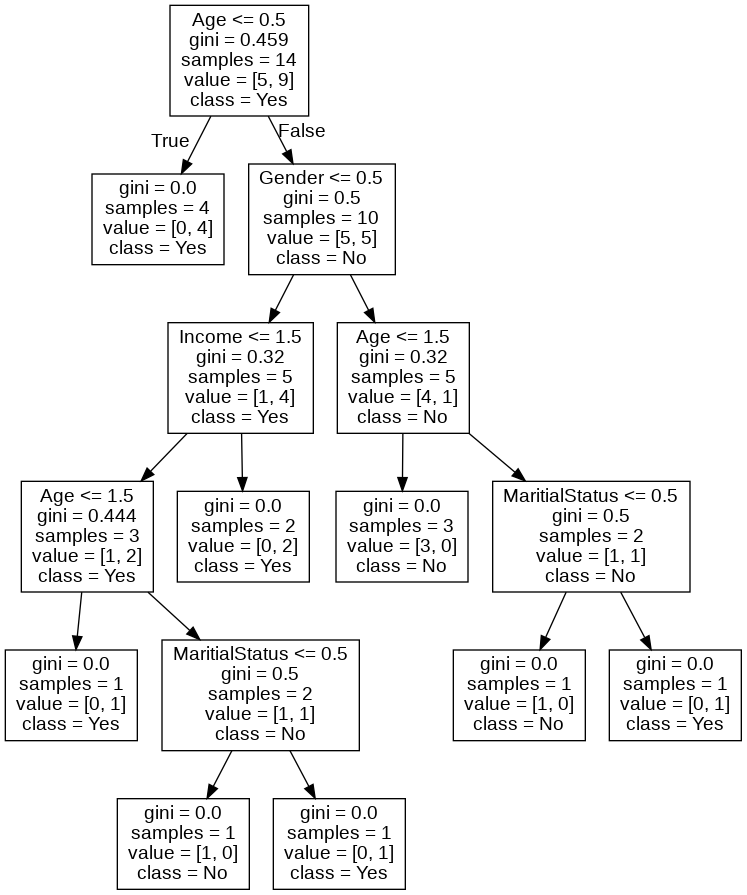

In [11]:
export_graphviz(dt,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
!dot -Tpng data.dot -o tree.png
Image("tree.png")